In [159]:
import logging, sys, re
import seaborn as sns
import pandas as pd
import sqlite3
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import download as nltkdownload
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from pipeline import construct_twitter_pipeline

Load tweets from Database

In [160]:
tweets_loader = construct_twitter_pipeline().extractor.file_handlers[0].loader
try:
    connection = sqlite3.connect("../data/project.sqlite")
    tweets = pd.read_sql_query(f"SELECT * FROM {tweets_loader.table_name}", connection)
except sqlite3.Error as e:
    logging.error(msg=f"Error while creating SQLite DB: {e}")
    sys.exit(1)
finally:
    connection.close()

Data Preprocessing

<Axes: xlabel='target', ylabel='count'>

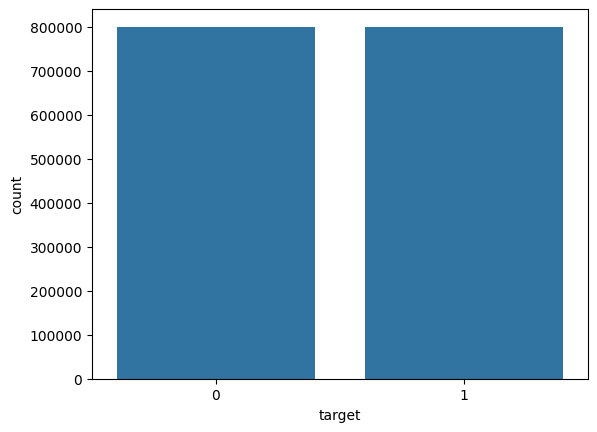

In [161]:
sns.countplot(x="target", data=tweets)

In [177]:
positive_tweet = tweets[tweets.target == 1]["processed_text"]
negative_tweet = tweets[tweets.target == 0]["processed_text"]
tweets[tweets.target == 1]["processed_text"].iloc[1000]

'matt great forget rest need spend night prayer caus hope tomorrow good dose grace amp merci'

(-0.5, 399.5, 199.5, -0.5)

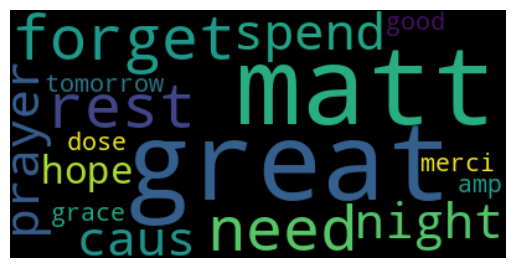

In [176]:
wordcloud = WordCloud().generate(positive_tweet.iloc[1000])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")